## S-bend

In [51]:
import meep as mp
from meep import mpb
print(mp.__version__)
import meep.adjoint as mpa
import math
import numpy as np
from autograd import numpy as npa
from matplotlib import pyplot as plt
from IPython.display import Video


mp.Verbosity(0)

1.27.0


Verbosity: level=1

In [58]:
geometry=[]

# the following functions are to be appended to an empty geometry=[]

class center():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z


def s_bend_parameters_extraction(block_width=1,block_height=1, waveguide_width=0.5,mid_section_waveguide_length=0):
     # this function is used for extracting the bend_radius and turn angle if the block height and width are given

    #diagonal across the quadrant and 2r*sin(theta)=block_width

    turn_angle=2*(np.pi/2 - np.arctan(block_width/(block_height-waveguide_width)))
    bend_radius=block_width/(2*np.sin(turn_angle))

    return bend_radius, turn_angle    



def s_bend(design=0,center=center(0,0,0),bend_radius=5, turn_angle=np.pi/2,mid_section_waveguide_length=0, waveguide_width=0.5, waveguide_height=0.22, waveguide_material=mp.Medium(index=3.45), cladding_material=mp.air):

    # design 0 is for top eft to bottom right, and 1 is for bottom left to top right
    
    block_height= mid_section_waveguide_length * np.sin(turn_angle) + 2*(bend_radius - bend_radius*np.cos(turn_angle)) + waveguide_width
    block_width= mid_section_waveguide_length * np.cos(turn_angle) + 2* bend_radius* np.sin(turn_angle)  


    # inner_circle_x=r*sin(theta)
    # inner_circle_y=r*cos(theta)
    # y is given, so x = r*sin(cosinv(y/r))

    # ____________
    # |          |
    # |   /      |
    # |_ /_______|
    # | /
    # |/


    #the main block
    geometry.append(mp.Block(material=waveguide_material, center=mp.Vector3(center.x,center.y,center.z), size=mp.Vector3(block_width, block_height, waveguide_height)))

    offset=waveguide_width *np.cos(turn_angle)/2

    if(design==0):

        #top left inner circle
        y=0
        inner_bend_radius=bend_radius-waveguide_width/2
        while(y+(inner_bend_radius)*np.cos(turn_angle) < inner_bend_radius):
            x = inner_bend_radius * np.sin(np.arccos((y+(inner_bend_radius)*np.cos(turn_angle)  )/inner_bend_radius))
            geometry.append(mp.Block(material=cladding_material, center=mp.Vector3(-(block_width/2)+(x)/2+center.x,y+center.y-offset,center.z), size=mp.Vector3(x,1/resolution,waveguide_height)))
            y=y+1/(2*resolution) # this multiplying by 2 removes the black strip  error

        # bottom right inner circle
        y=0
        inner_bend_radius=bend_radius-waveguide_width/2
        while(y+(inner_bend_radius)*np.cos(turn_angle) < inner_bend_radius):
            x = inner_bend_radius * np.sin(np.arccos((y+(inner_bend_radius)*np.cos(turn_angle)  )/inner_bend_radius))
            geometry.append(mp.Block(material=cladding_material, center=mp.Vector3((block_width/2)-(x)/2+center.x,-y+center.y+offset,center.z), size=mp.Vector3(x,1/resolution,waveguide_height)))
            y=y+1/(2*resolution) # this multiplying by 2 removes the black strip  error  

        # top right outer portion
        y=0
        outer_bend_radius=bend_radius+waveguide_width/2
        while(y+(outer_bend_radius)*np.cos(turn_angle) < outer_bend_radius):
            x = block_width - (outer_bend_radius * np.sin(np.arccos((y+(outer_bend_radius)*np.cos(turn_angle)  )/outer_bend_radius)))
            geometry.append(mp.Block(material=cladding_material, center=mp.Vector3((block_width/2)-(x)/2+center.x,y+center.y+offset,center.z), size=mp.Vector3(x,1/resolution,waveguide_height)))
            y=y+1/(2*resolution) # this multiplying by 2 removes the black strip  error

        # bottom left outer portion
        y=0
        outer_bend_radius=bend_radius+waveguide_width/2
        while(y+(outer_bend_radius)*np.cos(turn_angle) < outer_bend_radius):
            x = block_width - (outer_bend_radius * np.sin(np.arccos((y+(outer_bend_radius)*np.cos(turn_angle)  )/outer_bend_radius)))
            geometry.append(mp.Block(material=cladding_material, center=mp.Vector3(-(block_width/2)+(x)/2+center.x,-y+center.y-offset,center.z), size=mp.Vector3(x,1/resolution,waveguide_height)))
            y=y+1/(2*resolution) # this multiplying by 2 removes the black strip  error

        
        # adding a strip at the end for the edge dots
        
        y=-block_height/2+waveguide_width+(block_height-waveguide_width)/2
        geometry.append(mp.Block(material=cladding_material, center=mp.Vector3((block_width/2)+center.x,y+center.y,center.z), size=mp.Vector3(1/resolution,block_height-waveguide_width,waveguide_height)))

        y=block_height/2-waveguide_width-(block_height-waveguide_width)/2
        geometry.append(mp.Block(material=cladding_material, center=mp.Vector3(-(block_width/2)+center.x,y+center.y,center.z), size=mp.Vector3(1/resolution,block_height-waveguide_width,waveguide_height)))

    


    #reference waveguide
    # xx=4
    # geometry.append (mp.Block(center=mp.Vector3(-(block_width/2+xx/2)-2/resolution,block_height/2-waveguide_width/2,0),
    #                     size=mp.Vector3(xx,waveguide_width,waveguide_height),
    #                     material=Si))

    if(design==1):


        # bottom left inner circle
        y=0
        inner_bend_radius=bend_radius-waveguide_width/2
        while(y+(inner_bend_radius)*np.cos(turn_angle) < inner_bend_radius):
            x = inner_bend_radius * np.sin(np.arccos((y+(inner_bend_radius)*np.cos(turn_angle)  )/inner_bend_radius))
            geometry.append(mp.Block(material=cladding_material, center=mp.Vector3(-(block_width/2)+(x)/2+center.x,-y+center.y+offset,center.z), size=mp.Vector3(x,1/resolution,waveguide_height)))
            y=y+1/(2*resolution)   


        # top right inner circle
        y=0
        inner_bend_radius=bend_radius-waveguide_width/2
        while(y+(inner_bend_radius)*np.cos(turn_angle) < inner_bend_radius):
            x = inner_bend_radius * np.sin(np.arccos((y+(inner_bend_radius)*np.cos(turn_angle)  )/inner_bend_radius))
            geometry.append(mp.Block(material=cladding_material, center=mp.Vector3((block_width/2)-(x)/2+center.x,y+center.y-offset,center.z), size=mp.Vector3(x,1/resolution,waveguide_height)))
            y=y+1/(2*resolution)

        # top left outer portion
        y=0
        outer_bend_radius=bend_radius+waveguide_width/2
        while(y+(outer_bend_radius)*np.cos(turn_angle) < outer_bend_radius):
            x = block_width - (outer_bend_radius * np.sin(np.arccos((y+(outer_bend_radius)*np.cos(turn_angle)  )/outer_bend_radius)))
            geometry.append(mp.Block(material=cladding_material, center=mp.Vector3(-(block_width/2)+(x)/2+center.x,y+center.y+offset,center.z), size=mp.Vector3(x,1/resolution,waveguide_height)))
            y=y+1/(2*resolution) # this multiplying by 2 removes the black strip  error

        # bottom right outer portion
        y=0
        outer_bend_radius=bend_radius+waveguide_width/2
        while(y+(outer_bend_radius)*np.cos(turn_angle) < outer_bend_radius):
            x = block_width - (outer_bend_radius * np.sin(np.arccos((y+(outer_bend_radius)*np.cos(turn_angle)  )/outer_bend_radius)))
            geometry.append(mp.Block(material=cladding_material, center=mp.Vector3((block_width/2)-(x)/2+center.x,-y+center.y-offset,center.z), size=mp.Vector3(x,1/resolution,waveguide_height)))
            y=y+1/(2*resolution) # this multiplying by 2 removes the black strip  error   

        # adding a strip at the end for the edge dots
        y=block_height/2-waveguide_width-(block_height-waveguide_width)/2
        geometry.append(mp.Block(material=cladding_material, center=mp.Vector3((block_width/2)+center.x,y+center.y,center.z), size=mp.Vector3(1/resolution,block_height-waveguide_width,waveguide_height)))

        y=-block_height/2+waveguide_width+(block_height-waveguide_width)/2
        geometry.append(mp.Block(material=cladding_material, center=mp.Vector3(-(block_width/2)+center.x,y+center.y,center.z), size=mp.Vector3(1/resolution,block_height-waveguide_width,waveguide_height)))

    




In [59]:
class center():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z


mid_section_waveguide_length=0
waveguide_width=0.5
waveguide_height=0.0#0.22
center=center(0,0,0)
turn_angle=np.pi/3.565
bend_radius=6.724

## Using bend radius and turn angle

In [60]:

resolution=50
nSi = 3.45
Si = mp.Medium(index=nSi)
nSiO2 = 1.45
SiO2 = mp.Medium(index=nSiO2)

# mode frequency
fcen = 1/1.55
width = 0.2
fwidth = width * fcen
kpoint = mp.Vector3(1,0,0)

Sx=20
Sy=10

cell_size = mp.Vector3(Sx,Sy)
pml_size = 1.0 # (μm)

pml_layers = [mp.PML(pml_size)]

geometry = []


s_bend(design=1,center=center,bend_radius=bend_radius, turn_angle=turn_angle,waveguide_height=waveguide_height)

s_bend_block_height= mid_section_waveguide_length * np.sin(turn_angle) + 2*(bend_radius - bend_radius*np.cos(turn_angle)) + waveguide_width
s_bend_block_width= mid_section_waveguide_length * np.cos(turn_angle) + 2* bend_radius* np.sin(turn_angle) 

xx=4
geometry.append (mp.Block(center=mp.Vector3(-(s_bend_block_width/2+xx/2)+center.x,-(s_bend_block_height/2-waveguide_width/2)+center.y,0),
                    size=mp.Vector3(xx,waveguide_width,waveguide_height),
                    material=Si))

geometry.append (mp.Block(center=mp.Vector3(-(s_bend_block_width/2+xx/2)+center.x,(s_bend_block_height/2-waveguide_width/2)+center.y,0),
                    size=mp.Vector3(xx,waveguide_width,waveguide_height),
                    material=Si))





src_cw = mp.ContinuousSource(frequency=1 / 1.55, fwidth=fwidth)
sources_cw = [
    mp.EigenModeSource(
        src_cw,
        eig_band=1,
        direction=mp.NO_DIRECTION,
        eig_kpoint=kpoint,
        size=mp.Vector3(0,2*waveguide_width,0),
        center=mp.Vector3(-s_bend_block_width/2-1+center.x,-(s_bend_block_height-waveguide_width/2)/2+center.y,0),
        amplitude=1.0
    )]





sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources_cw,
                    #symmetries=[mp.Mirror(direction=mp.Y)],
                    default_material=mp.air,
                    resolution=resolution)

     block, center = (0,0,0)
          size (10.3754,5.39237,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (-2.6903,0.15905,0)
          size (4.99484,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-2.69443,0.14905,0)
          size (4.98658,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-2.69858,0.13905,0)
          size (4.97828,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-2.70275,0.12905,0)
          size (4.96995,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-2.70693,0.11905,0)
          size (4.96159,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectr

     ...(+ 975 objects not shown)...


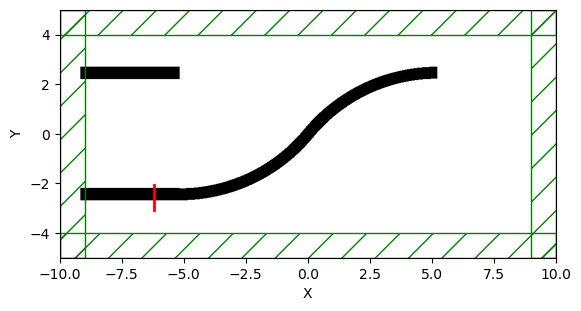

In [61]:

plt.figure(dpi=100)
sim.plot2D(
    output_plane = mp.Volume(
        center = mp.Vector3(z=0.0),
        size = mp.Vector3(x=Sx,y=Sy)
    ))
plt.show()

## Using block height and width

In [68]:

resolution=50
nSi = 3.45
Si = mp.Medium(index=nSi)
nSiO2 = 1.45
SiO2 = mp.Medium(index=nSiO2)

# mode frequency
fcen = 1/1.55
width = 0.2
fwidth = width * fcen
kpoint = mp.Vector3(1,0,0)

Sx=20
Sy=10

cell_size = mp.Vector3(Sx,Sy)
pml_size = 1.0 # (μm)

pml_layers = [mp.PML(pml_size)]

geometry = []

test_len=4
xxx=8
yyy=3
wg1_center=mp.Vector3(-xxx,-yyy,0)
wg2_center=mp.Vector3(xxx,yyy)

geometry.append (mp.Block(center=wg1_center,
                    size=mp.Vector3(test_len,waveguide_width,waveguide_height),
                    material=Si))

geometry.append (mp.Block(center=wg2_center,
                    size=mp.Vector3(test_len,waveguide_width,waveguide_height),
                    material=Si))

block_width=2*(xxx-test_len/2)
block_height=2*yyy+waveguide_width
r,a=s_bend_parameters_extraction(block_width=block_width, block_height=block_height)


s_bend(design=1,center=center,bend_radius=r, turn_angle=a,waveguide_height=waveguide_height)

# s_bend_block_height= mid_section_waveguide_length * np.sin(turn_angle) + 2*(bend_radius - bend_radius*np.cos(turn_angle)) + waveguide_width
# s_bend_block_width= mid_section_waveguide_length * np.cos(turn_angle) + 2* bend_radius* np.sin(turn_angle) 







src_cw = mp.ContinuousSource(frequency=1 / 1.55, fwidth=fwidth)
sources_cw = [
    mp.EigenModeSource(
        src_cw,
        eig_band=1,
        direction=mp.NO_DIRECTION,
        eig_kpoint=kpoint,
        size=mp.Vector3(0,2*waveguide_width,0),
        center=mp.Vector3(-block_width/2-1+center.x,-(block_height-waveguide_width/2)/2+center.y,0),
        amplitude=1.0
    )]





sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources_cw,
                    #symmetries=[mp.Mirror(direction=mp.Y)],
                    default_material=mp.air,
                    resolution=resolution)

     block, center = (-8,-3,0)
          size (4,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (8,3,0)
          size (4,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,0,0)
          size (12,6.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (-3.1,0.15,0)
          size (5.8,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-3.10376,0.14,0)
          size (5.79249,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-3.10753,0.13,0)
          size (5.78495,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagona

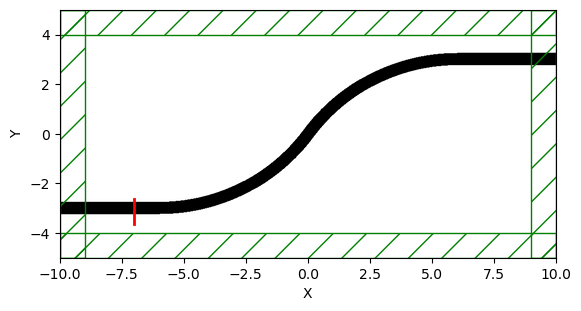

In [69]:

plt.figure(dpi=100)
sim.plot2D(
    output_plane = mp.Volume(
        center = mp.Vector3(z=0.0),
        size = mp.Vector3(x=Sx,y=Sy)
    ))
plt.show()

In [70]:
sim.run(until=150)


-----------
Initializing structure...
time for choose_chunkdivision = 0.00709605 s
Working in 2D dimensions.
Computational cell is 20 x 10 x 0 with resolution 50
     block, center = (-8,-3,0)
          size (4,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (8,3,0)
          size (4,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,0,0)
          size (12,6.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (-3.1,0.15,0)
          size (5.8,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-3.10376,0.14,0)
          size (5.79249,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,

     block, center = (-8,-3,0)
          size (4,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (8,3,0)
          size (4,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,0,0)
          size (12,6.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (-3.1,0.15,0)
          size (5.8,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-3.10376,0.14,0)
          size (5.79249,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-3.10753,0.13,0)
          size (5.78495,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagona

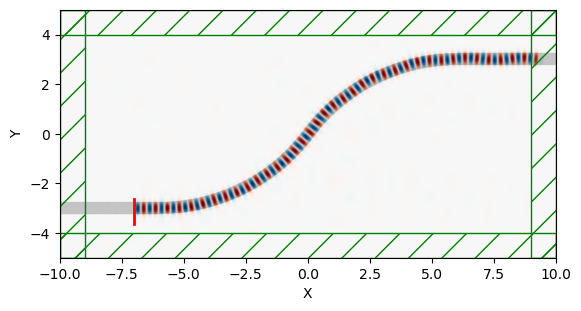

In [71]:
plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [73]:
sim.reset_meep()
f = plt.figure(dpi=100)
Animate = mp.Animate2D(fields=mp.Ez, realtime=False, normalize=True)
plt.close()

<Figure size 640x480 with 0 Axes>

In [74]:
sim.run(mp.at_every(1, Animate), until=150)
plt.close()

-----------
Initializing structure...
time for choose_chunkdivision = 0.00760102 s
Working in 2D dimensions.
Computational cell is 20 x 10 x 0 with resolution 50
     block, center = (-8,-3,0)
          size (4,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (8,3,0)
          size (4,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,0,0)
          size (12,6.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (-3.1,0.15,0)
          size (5.8,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-3.10376,0.14,0)
          size (5.79249,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,

In [75]:
filename = "s_bend.mp4"
Animate.to_mp4(10, filename)

Generating MP4...


In [76]:
Video(filename)
